# EDA PABLO HORTAL LLERA

## Analisis de las startups unicornio en el mundo.

### Introducción al Análisis Exploratorio de Datos sobre los factores que afectan a las startups unicornio en el mundo. 

En los últimos años, se ha visto un aumento en el número de startups que han alcanzado la valoración de unicornio, es decir, han alcanzado un valor de mercado de mil millones de dólares o más. A medida que este fenómeno continúa creciendo, se hace cada vez más importante entender los factores que contribuyen al éxito de estas startups. En este análisis EDA, se explorará un conjunto de datos que contiene información sobre las startups unicornio en todo el mundo, con el objetivo de identificar patrones y tendencias que puedan ayudar a entender los factores clave detrás del éxito de estas empresas emergentes. A través de este análisis, esperamos descubrir información valiosa para emprendedores, inversores y otros interesados en el mundo de las startups y la innovación empresarial.

## Datos:
Soy Pablo Hortal Llera, Asturiano de 28 años residente en Madrid desde hace 6. Me dedico al mundo de las ventas y soy socio de una starup, por eso mi interes por los unicornios. 

In [4]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import os 

In [5]:

unicornios = pd.read_csv('C:/Users/horta/Desktop/EDA/World_Wide_Unicorn_Startups.csv')

In [3]:
unicornios.head(10)

,Company,Valuation,Date,Country,City,Industry,Investors,year,month,day
0,Bytedance,140.0,4/7/2017,China,Beijing,Artificial intelligence,"0 Sequoia Capital China, SIG Asia Investm...",2017,7,4
1,SpaceX,100.3,12/1/2012,United States,Hawthorne,Other,"0 Sequoia Capital China, SIG Asia Investm...",2012,1,12
2,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2014,23,1
3,Klarna,45.6,12/12/2011,Sweden,Stockholm,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2011,12,12
4,Canva,40.0,1/8/2018,Australia,Surry Hills,Internet software & services,"0 Sequoia Capital China, SIG Asia Investm...",2018,8,1
5,Instacart,39.0,12/30/2014,United States,San Francisco,"Supply chain, logistics, & delivery","0 Sequoia Capital China, SIG Asia Investm...",2014,30,12
6,Databricks,38.0,2/5/2019,United States,San Francisco,Data management & analytics,"0 Sequoia Capital China, SIG Asia Investm...",2019,5,2
7,Revolut,33.0,4/26/2018,United Kingdom,London,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2018,26,4
8,Nubank,30.0,3/1/2018,Brazil,Sao Paulo,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",2018,1,3
9,Epic Games,28.7,10/26/2018,United States,Cary,Other,"0 Sequoia Capital China, SIG Asia Investm...",2018,26,10


In [4]:
unicornios.shape

(936, 10)

In [5]:
unicornios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Company    936 non-null    object 
 1   Valuation  936 non-null    float64
 2   Date       936 non-null    object 
 3   Country    936 non-null    object 
 4   City       921 non-null    object 
 5   Industry   936 non-null    object 
 6   Investors  936 non-null    object 
 7   year       936 non-null    int64  
 8   month      936 non-null    int64  
 9   day        936 non-null    int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 73.2+ KB


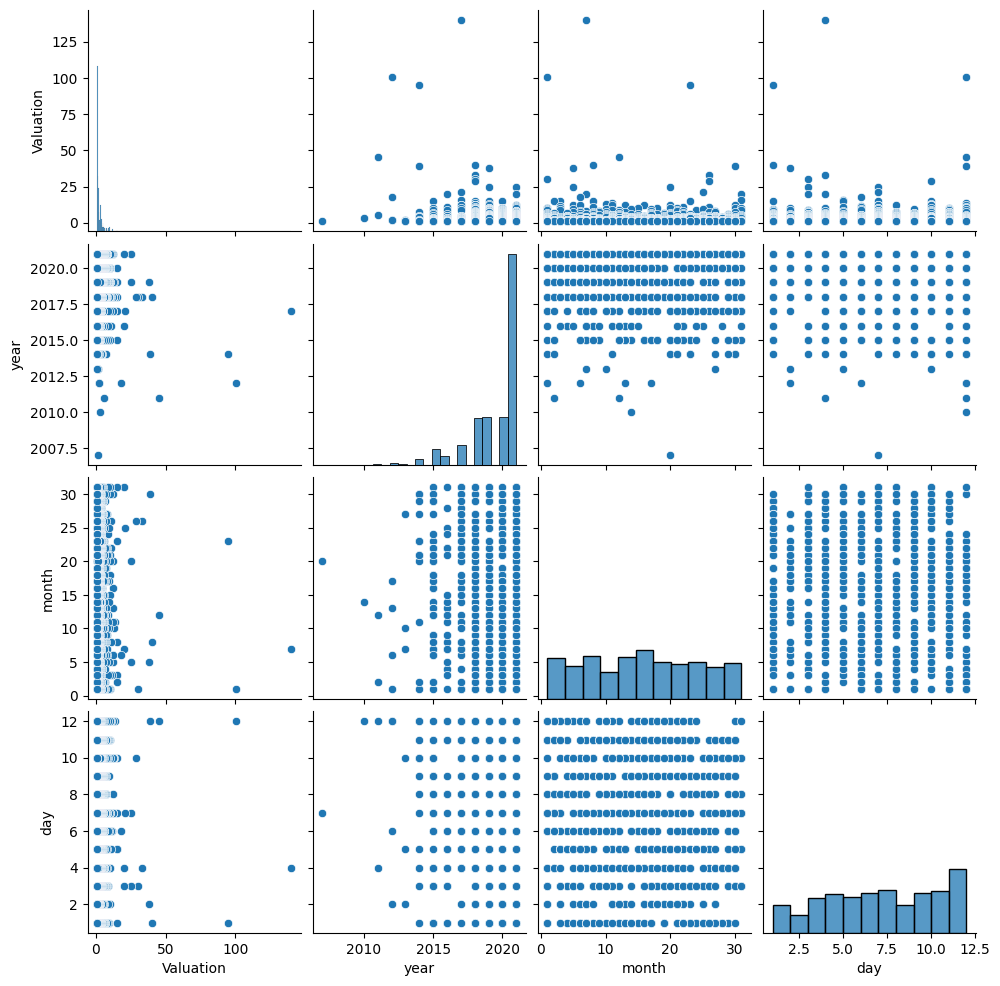

In [7]:
sns.pairplot(unicornios)

# ANÁLISIS UNIVARIANTE

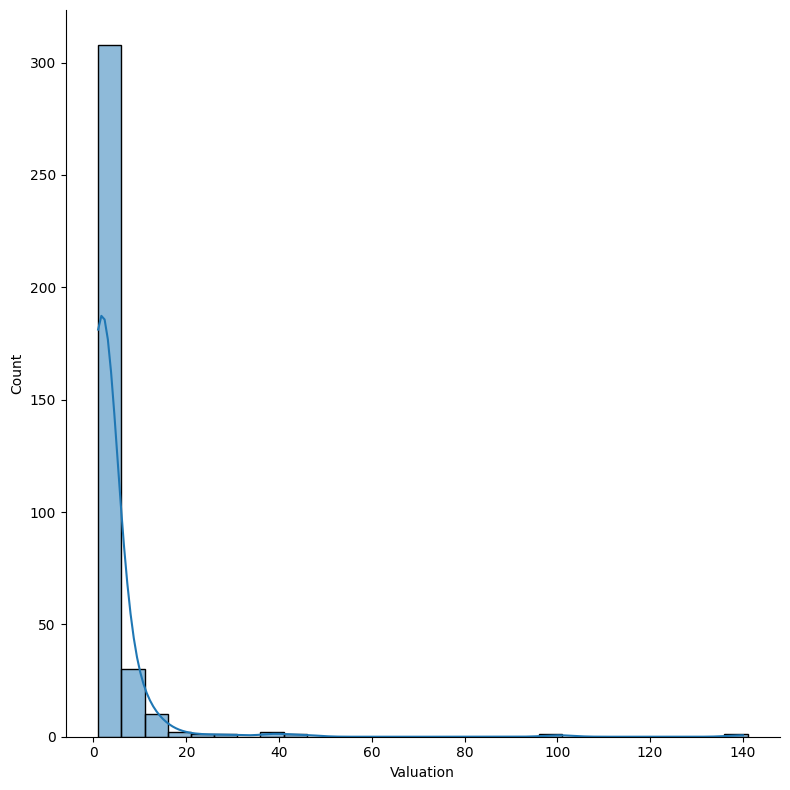

In [24]:
sns.displot(unicornios["Valuation"], kde=True, height=8, binwidth=5)


In [48]:
from scipy.stats import normaltest

# Prueba D'Agostino-Pearson en la columna "Valuation"
statistic, p_value = normaltest(unicornios['Valuation'])
print("Estadístico: ", statistic)
print("Valor p: ", p_value)

alpha = 0.05
if p_value < alpha:
    print("La hipótesis nula (los datos siguen una distribución normal) se rechazza")
else:
    print("La hipótesis nula (los datos siguen una distribución normal) no se puede rechazar")


Estadístico:  605.9171191541335
Valor p:  2.6715870542003507e-132
La hipótesis nula (los datos siguen una distribución normal) se rechazza


<Axes: xlabel='Valuation'>

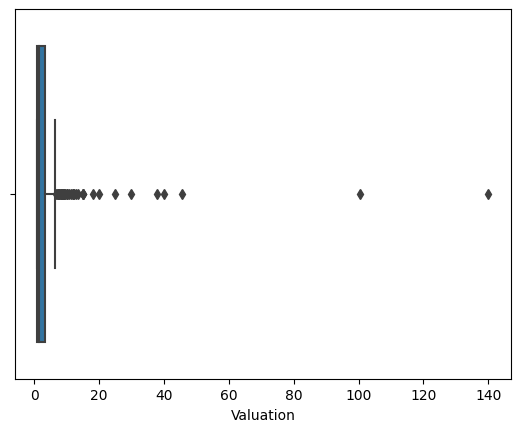

In [25]:
sns.boxplot(x=unicornios["Valuation"])

--------------------------------------------------------------------------------------------------------------

Para la variable "Valuation", hago un histograma y calculo su media y desviación estándar para tener una idea de la distribución de los valores y la dispersión de los mismos.

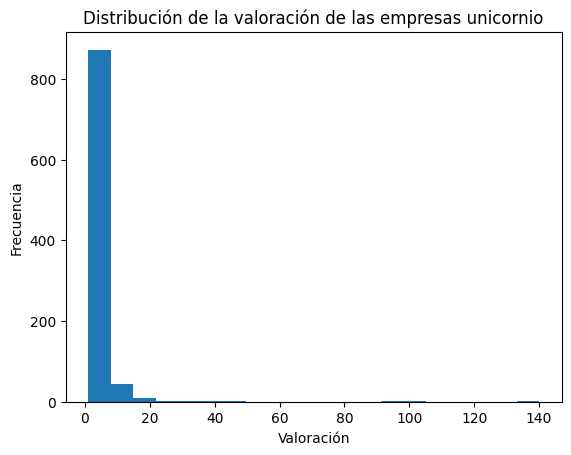

Media:  3.281153846153846
Desviación estándar:  7.469185640933321


In [7]:

# Creo el histograma y calculo media+desviaión estandar
plt.hist(unicornios['Valuation'], bins=20)
plt.xlabel('Valoración')
plt.ylabel('Frecuencia')
plt.title('Distribución de la valoración de las empresas unicornio')
plt.show()

media = np.mean(unicornios['Valuation'])
desviacion_estandar = np.std(unicornios['Valuation'])
print("Media: ", media)
print("Desviación estándar: ", desviacion_estandar)


La media obtenida de 3.28 indica que el valor promedio de las valoraciones de las empresas unicornio en el dataset es de 3.28.

La desviación estándar obtenida de 7.47 indica que los valores de las valoraciones están dispersos en un rango de 7.47 alrededor de la media. Una desviación estándar alta indica que hay una gran variabilidad en los datos. En este caso, una desviación estándar de 7.47 sugiere que hay una amplia gama de valoraciones en las empresas unicornio del dataset, lo que puede ser útil para identificar las empresas más valiosas.

------------------------------------------------------------------------------------------

Ahora vamos a calcular las frecuencias de cada sector de industria. Ya que nos permitirá tener una idea de cuáles son los sectores más comunes en las empresas unicornio y, por lo tanto, identificar las áreas de negocio más exitosas en este tipo de empresas. Esta información puede ser de utilidad para inversores, emprendedores y otras partes interesadas en la industria de startups y tecnología. Además, también nos permite tener una mejor comprensión del panorama empresarial actual en términos de sectores y tendencias emergentes. 

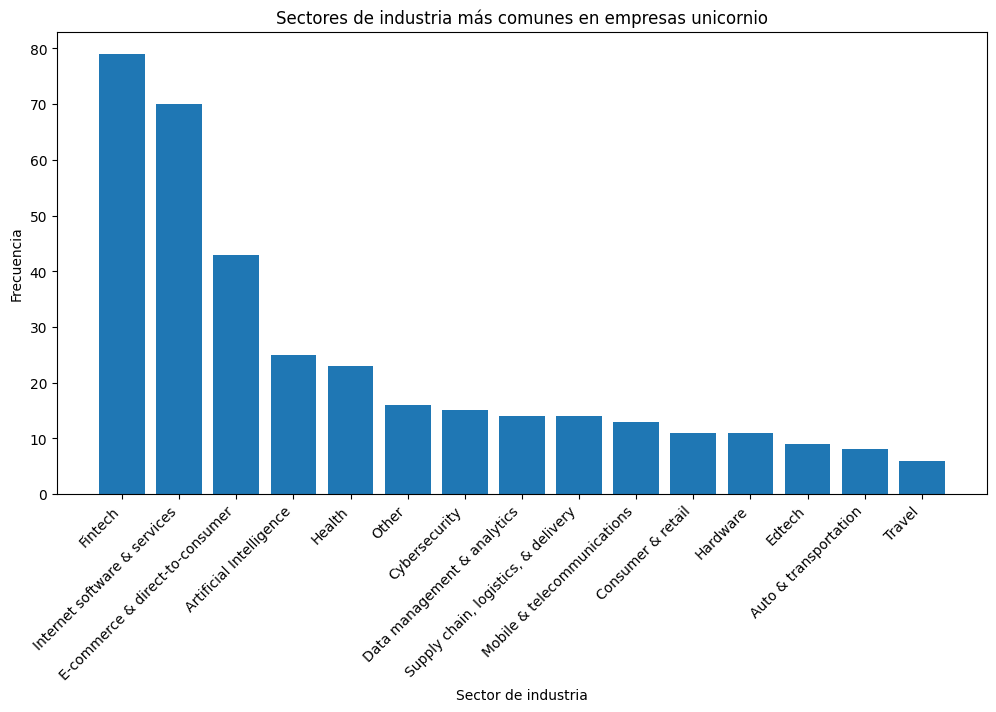

In [45]:
# Reemplazo la cadena de caracteres en la columna 'Industry' y 'Fintech'
unicornios['Industry'] = unicornios['Industry'].replace(['Artificial Intelligence', 'Artificial intelligence'], 'Artificial Intelligence')
unicornios['Industry'] = unicornios['Industry'].replace(['Fintech', 'Finttech'], 'Fintech')
# Agrupo por sector de industria, cuento las frecuencias y ordeno de mayor a menor
frecuencia_industrias = unicornios.groupby('Industry').size().reset_index(name='Frecuencia')
frecuencia_industrias = frecuencia_industrias.sort_values(by=['Frecuencia'], ascending=False)

# Grafico de barras
plt.figure(figsize=(12,6))
plt.bar(frecuencia_industrias['Industry'], frecuencia_industrias['Frecuencia'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Sector de industria')
plt.ylabel('Frecuencia')
plt.title('Sectores de industria más comunes en empresas unicornio')
plt.show()


Fintech, Ecommerce e Internet Software Services son los sectores de industria más comunes entre las empresas unicornio, por lo que podemos intuir que estos sectores tienen una alta probabilidad de éxito y de generar altas valoraciones en el mercado actual. Esto podría deberse a varios factores, como la creciente importancia de la tecnología en el mundo de los negocios y la creciente demanda de soluciones financieras y de comercio electrónico en línea. Además, estos sectores podrían estar atrayendo una mayor inversión de capital de riesgo debido a su potencial de crecimiento y rentabilidad.

# ANÁLISIS BIVARIANTE

In [53]:
unicornios.describe(include='all')

C:\Users\horta\AppData\Local\Temp\ipykernel_19248\2372149789.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  unicornios.describe(include='all')


,Company,Valuation,Date,Country,City,Industry,Investors,year,month,day,fecha,mes_numero
count,357,357.000000,357,357,353,357,357,357.000000,357.000000,357.000000,357,357.000000
unique,357,NaN,234,33,122,15,1,NaN,NaN,NaN,234,NaN
top,Bytedance,NaN,11/10/2021,United States,San Francisco,Fintech,"0 Sequoia Capital China, SIG Asia Investm...",NaN,NaN,NaN,2021-10-11 00:00:00,NaN
freq,1,NaN,7,173,49,79,357,NaN,NaN,NaN,7,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-02-04 00:00:00,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-10 00:00:00,NaN
mean,NaN,3.964566,NaN,NaN,NaN,NaN,NaN,2019.509804,6.504202,6.907563,NaN,6.504202
std,NaN,10.151323,NaN,NaN,NaN,NaN,NaN,2.025966,3.524092,3.320835,NaN,3.524092
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,2011.000000,1.000000,1.000000,NaN,1.000000
25%,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,2018.000000,3.000000,4.000000,NaN,3.000000


In [51]:
unic_grup_ind = unicornios.groupby('Industry')['Valuation'].agg(['count', 'mean', 'sum']).sort_values(by='mean', ascending=False)

print(unic_grup_ind)


                                     count      mean     sum
Industry                                                    
Other                                   16  8.998750  143.98
Artificial Intelligence                 25  8.725600  218.14
Auto & transportation                    8  4.873750   38.99
Fintech                                 79  4.293038  339.15
Data management & analytics             14  4.112857   57.58
Internet software & services            70  3.366000  235.62
E-commerce & direct-to-consumer         43  3.130000  134.59
Consumer & retail                       11  3.084545   33.93
Edtech                                   9  2.793333   25.14
Supply chain, logistics, & delivery     14  2.730000   38.22
Health                                  23  2.576087   59.25
Travel                                   6  2.566667   15.40
Hardware                                11  2.212727   24.34
Cybersecurity                           15  1.959333   29.39
Mobile & telecommunicati

Este análisis bivariante muestra el conteo, la media y la suma de la columna 'Valuation' agrupada por la columna 'Industry'. Ordenará los resultados en función de la media de las valoraciones agrupadas por la industria, en orden descendente.
El resultado es una tabla que muestra el conteo de empresas en cada sector de la industria, la media de la valoración y la suma total de la valoración en cada sector.

Al analizar los resultados, podemos sacar varias conclusiones:

Los sectores "Other" y "Artificial Intelligence" tienen los valores más altos de media y suma de valuación. 
El sector "Fintech" tiene el mayor número de empresas unicornio, con un total de 79.
Los sectores con menor media y suma de valuación son "Mobile & telecommunications" y "Cybersecurity", respectivamente.
Los sectores con menor cantidad de empresas unicornio son "Travel" y "Edtech", con solo 6 y 9 respectivamente.

En general, podemos ver que los sectores tecnológicos son los que tienen más presencia en la lista de empresas unicornio, y los sectores financieros y de inteligencia artificial son los que tienen los valores más altos.

--------------------------

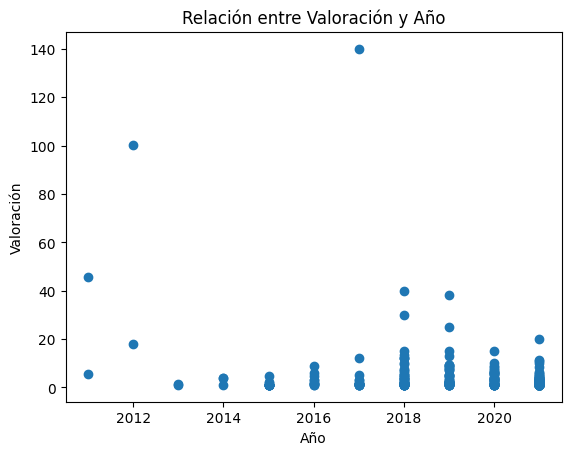

In [60]:

# Creo el gráfico de dispersión
plt.scatter(unicornios["year"], unicornios["Valuation"])

plt.xlabel("Año")
plt.ylabel("Valoración")
plt.title("Relación entre Valoración y Año")
plt.show()


A partir del gráfico de dispersión que he creado, es posible observar que la mayoría de las empresas unicornio tienen una valoración menor a 30 billones de dólares, y que la mayoría de ellas fueron fundadas en los últimos 10 años. También se puede ver que hay una cantidad significativa de empresas unicornio entre los años 2012-2016 y que tienen una valoración entre 0 y 10 billones de dólares. Además, se puede notar una dispersión mayor en las empresas fundadas hace más de 10 años, lo que puede ser indicativo de una mayor variabilidad en las valoraciones de las empresas más antiguas.

# Analisis multivariante

Para el analisis multivariante voy a calcular la matriz de correlación entre las variable.

In [70]:
# matriz de correlación
correlacion_matriz = unicornios[['Valuation', 'year', 'month', 'day']].corr()
correlacion_matriz = unicornios.corr()
print(correlacion_matriz)



            Valuation      year     month       day  mes_numero
Valuation    1.000000 -0.263822 -0.034605 -0.023996   -0.034605
year        -0.263822  1.000000 -0.009743 -0.024289   -0.009743
month       -0.034605 -0.009743  1.000000 -0.037771    1.000000
day         -0.023996 -0.024289 -0.037771  1.000000   -0.037771
mes_numero  -0.034605 -0.009743  1.000000 -0.037771    1.000000


C:\Users\horta\AppData\Local\Temp\ipykernel_19248\1607966028.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion_matriz = unicornios.corr()


C:\Users\horta\AppData\Local\Temp\ipykernel_19248\1675444232.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion_matriz = unicornios_sin_mes.corr()


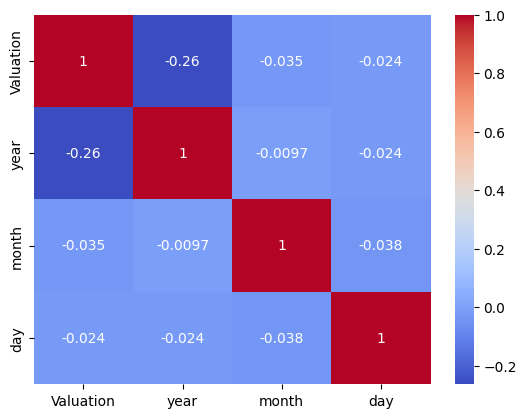

In [72]:

unicornios_sin_mes = unicornios.drop('mes_numero', axis=1)
correlacion_matriz = unicornios_sin_mes.corr()

sns.heatmap(correlacion_matriz, annot=True, cmap="coolwarm")
plt.show()


Para interpretar estos resultados, debemos tener en cuenta los siguientes puntos:

Los coeficientes de correlación varían entre -1 y 1. Un valor de 1 indica una correlación positiva perfecta, un valor de -1 indica una correlación negativa perfecta y un valor de 0 indica que no hay correlación entre las variables.
Las correlaciones más fuertes (ya sean positivas o negativas) se observan en las celdas que tienen valores más cercanos a -1 o 1. Los valores cercanos a 0 indican una correlación débil o inexistente.

A partir de los resultados, se pueden obtener las siguientes conclusiones:

La correlación entre "Valuation" y "year" es negativa y moderada (-0.263822). Esto indica que a medida que aumentan los años, la valoración tiende a disminuir. Sin embargo, la correlación no es muy fuerte, por lo que no se puede establecer una relación clara entre estas dos variables.

Las correlaciones entre "Valuation" y "month" (-0.034605), "Valuation" y "day" (-0.023996), "year" y "month" (-0.009743), "year" y "day" (-0.024289), y "month" y "day" (-0.037771) son todas muy bajas y cercanas a 0. Esto sugiere que no hay relaciones lineales significativas entre estos pares de variables.

En resumen, el mapa de calor muestra una correlación negativa moderada entre la valoración y el año, pero las otras variables no parecen tener relaciones lineales significativas entre sí. 

# Hipotesis
-  A partir del año 2020 se observa una tendencia positiva en el número de startups que alcanzan el estatus de unicornio. 
- Hay una relación entre la ubicación geográfica y el éxito de una startup
- Existen diferencias en la valoración promedio de las startups unicornio según el país en la que se encuentran.
- Existen ciudades específicas donde se concentra una cantidad significativa de startups unicornio.
- Hay patrones estacionales en el momento en que las startups alcanzan el estatus de unicornio

## Hipótesis 1
 A partir del año 2020 se observa una tendencia positiva en el número de startups que alcanzan el estatus de unicornio. 

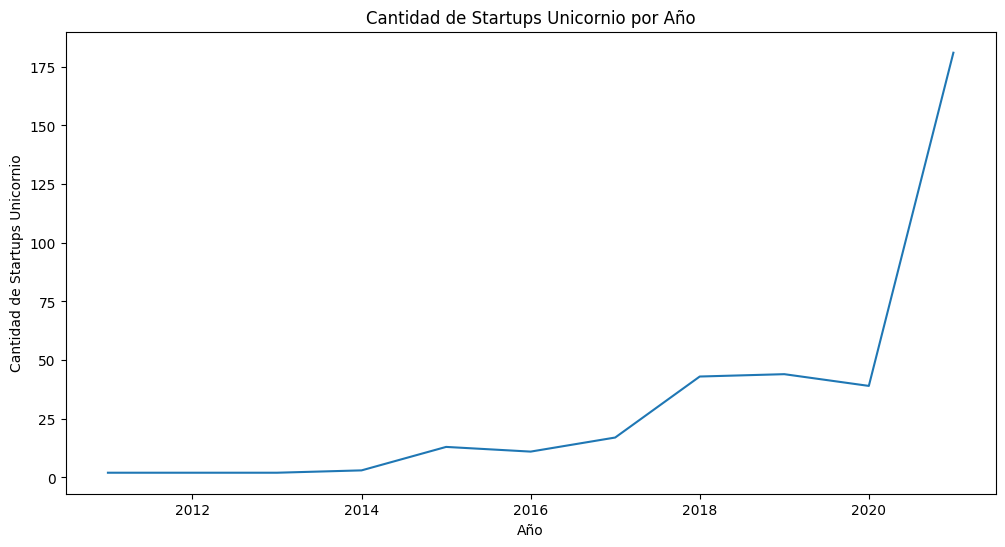

In [38]:
# Agrupo los datos por año y contar la cantidad de unicornios por año y creo un gráfico de línea
unicornios_por_anio = unicornios.groupby('year')['Company'].count()
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(unicornios_por_anio.index, unicornios_por_anio.values)
ax.set_title('Cantidad de Startups Unicornio por Año')
ax.set_xlabel('Año')
ax.set_ylabel('Cantidad de Startups Unicornio')
plt.show()

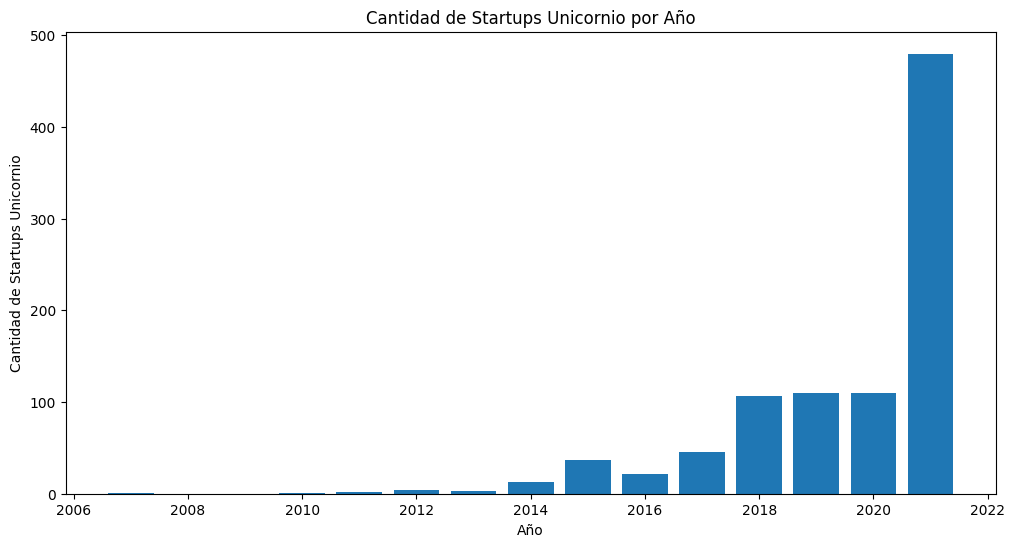

In [9]:

unicornios_por_anio = unicornios.groupby('year')['Company'].count()
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(unicornios_por_anio.index, unicornios_por_anio.values)
ax.set_title('Cantidad de Startups Unicornio por Año')
ax.set_xlabel('Año')
ax.set_ylabel('Cantidad de Startups Unicornio')
plt.show()


## Hipótesis 2
Hay una relación entre la ubicación geográfica y el éxito de una startup.

In [15]:

unicornios['Successful'] = (unicornios['Valuation'] > unicornios['Valuation'].median()).astype(int)
tabla_contingencia = pd.crosstab(unicornios['Country'], unicornios['Successful'])

from scipy.stats import chi2_contingency #espero que esta parte esté bien :(

estadistico, p_valor, _, _ = chi2_contingency(tabla_contingencia)
print("El valor p es:", p_valor)



El valor p es: 0.34785065736317


Según el análisis realizado mediante la prueba de chi cuadrado, se obtuvo un valor p de 0.35. Esto indica que no hay suficiente evidencia para rechazar la hipótesis nula de que no hay relación significativa entre la ubicación geográfica y el éxito de una startup. Por lo tanto, no se puede afirmar que la ubicación geográfica sea un factor determinante en el éxito de una startup. Sin embargo, cabe destacar que este resultado debe ser interpretado con precaución, ya que existen otros factores que pueden influir en el éxito de una startup.

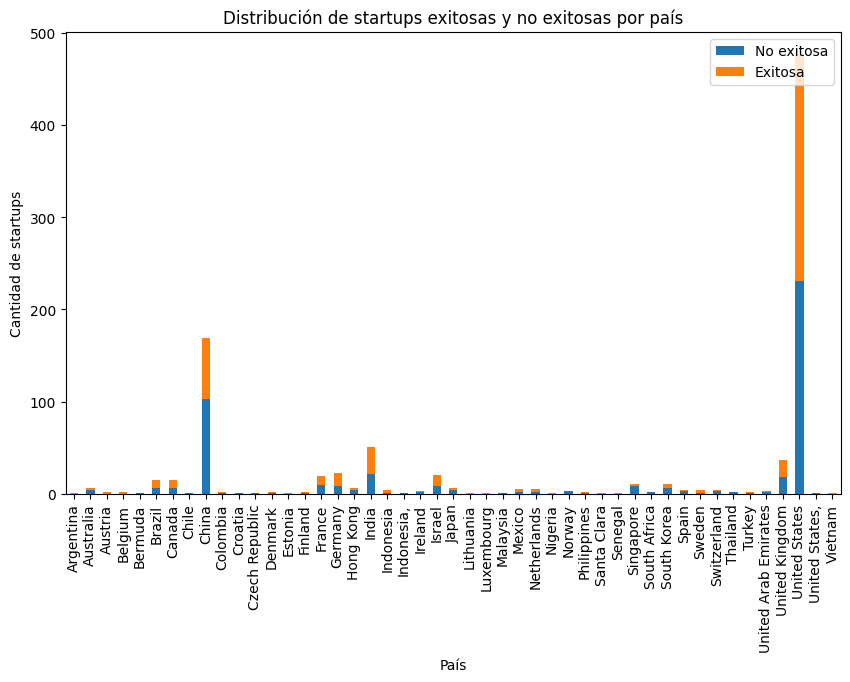

In [16]:

# Creo la tabla de contingencia
tabla_contingencia = pd.crosstab(unicornios['Country'], unicornios['Successful'])

# Creo el gráfico de barras apiladas (creo que se llama así, espero no equivoarme)
ax = tabla_contingencia.plot(kind='bar', stacked=True, figsize=(10,6))

# Configuro los ejes y las etiquetas
ax.set_xlabel('País')
ax.set_ylabel('Cantidad de startups')
ax.set_title('Distribución de startups exitosas y no exitosas por país')

# Agrego leynda
ax.legend(['No exitosa', 'Exitosa'], loc='upper right')

# printeo el gráfico este
plt.show()


En la tabla de contingencia creada con "pd.crosstab", se cuenta la cantidad de startups exitosas y no exitosas para cada país. Por lo tanto, en el gráfico de barras apiladas, las barras de color azul corresponden a la cantidad de startups no exitosas y las barras de color naranja corresponden a la cantidad de startups exitosas para cada país.

Cada barra representa un país y está dividida en dos secciones: la sección inferior representa la cantidad de startups no exitosas y la sección superior representa la cantidad de startups exitosas. La altura total de cada barra representa la cantidad total de startups para ese país. En el código se crea la columna "Successful" que indica si la startup fue exitosa o no. Para esto, se compara el valor de la columna "Valuation" de cada startup con la mediana de los valores de "Valuation" de todas las startups. Si el valor de "Valuation" de una startup es mayor que la mediana, se considera que la startup fue exitosa y se asigna el valor 1 en la columna "Successful". En caso contrario, se asigna el valor 0.

Este gráfico nos permite visualizar cómo se distribuyen las startups exitosas y no exitosas en diferentes países. Podemos observar que Estados Unidos tiene la mayor cantidad de startups exitosas y no exitosas en comparación con otros países, lo que sugiere que es un mercado importante para las startups. También podemos ver que algunos países tienen una proporción más alta de startups exitosas en comparación con otras, lo que puede ser interesante para futuros análisis.

## Hipótesis 3
Existen diferencias en la valoración promedio de las startups unicornio según el país en la que se encuentran

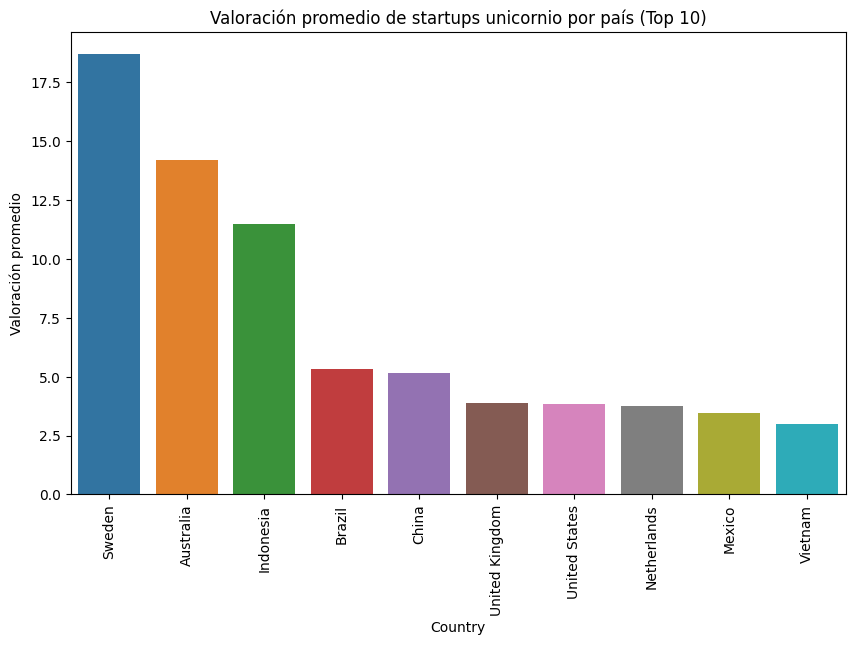

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Creo un subset con las 10 principales valoraciones promedio por país y lo represento en un gráfico de barras. 
valoracion_top_10_paises = unicornios.groupby('Country')['Valuation'].mean().nlargest(10).reset_index()
valoracion_top_10_paises = valoracion_top_10_paises.rename(columns={'Valuation': 'Valoración promedio'})

plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Valoración promedio', data=valoracion_top_10_paises)
plt.xticks(rotation=90)
plt.title('Valoración promedio de startups unicornio por país (Top 10)')
plt.show()


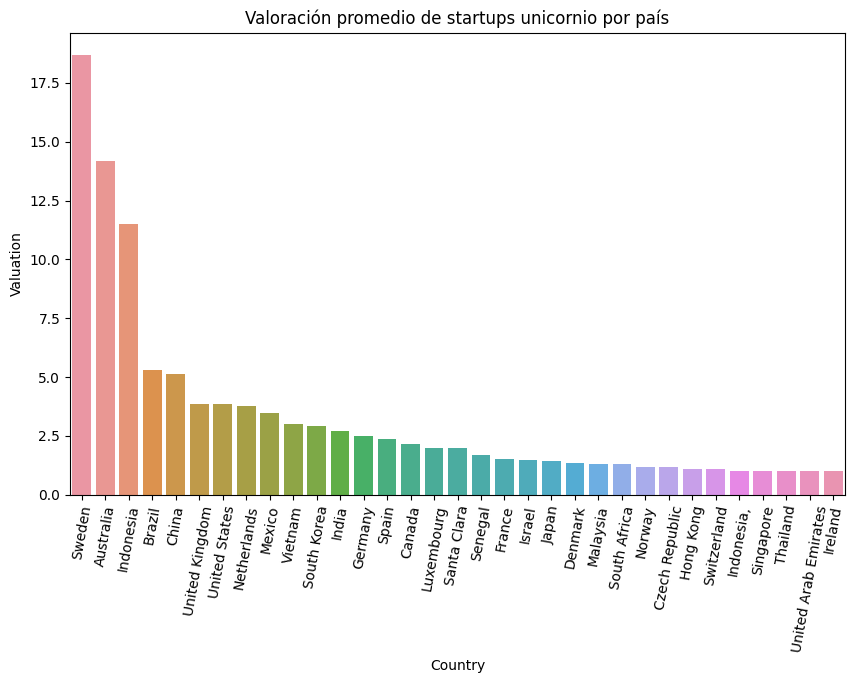

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Calculo la valoración promedio por país, rrdeno los países por valoración promedio descendente y visualizo los resultados
valoracion_por_pais = unicornios.groupby('Country')['Valuation'].mean().reset_index()
valoracion_por_pais = valoracion_por_pais.sort_values(by='Valuation', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Valuation', data=valoracion_por_pais)
plt.xticks(rotation=80)
plt.title('Valoración promedio de startups unicornio por país')
plt.show()



¿Por qué valen más en promedio?¿es por el sector?

In [74]:
unicornios_suecia = unicornios[unicornios['Country'] == 'Sweden']
frecuencia_industrias_suecia = unicornios_suecia['Industry'].value_counts()
print(frecuencia_industrias_suecia)



Fintech                         1
Other                           1
Internet software & services    1
Name: Industry, dtype: int64


# Hipótesis 4
Existen ciudades específicas donde se concentra una cantidad significativa de startups unicornio respecto a otras

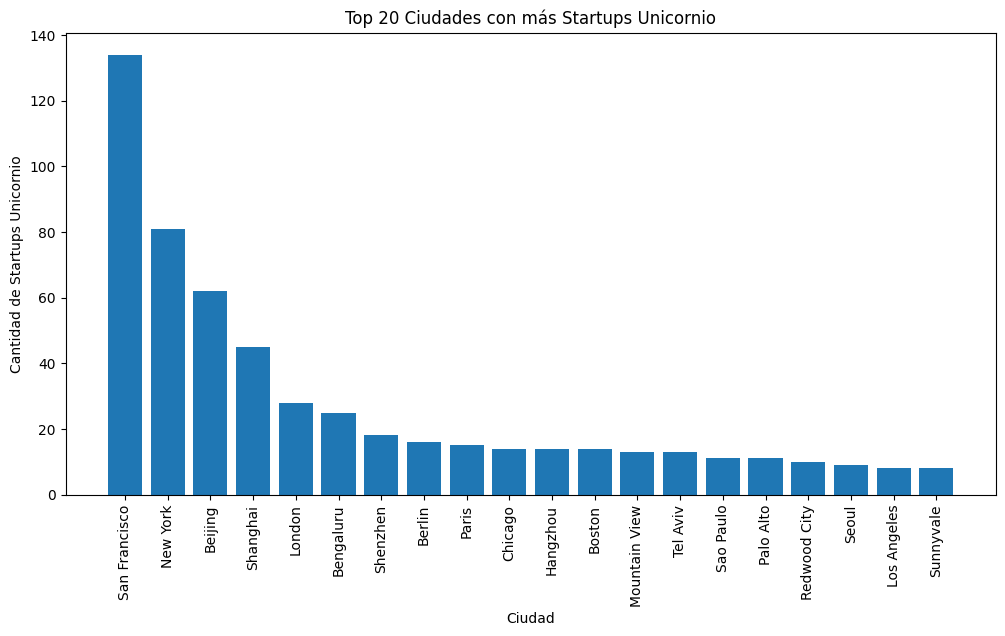

In [19]:

# Cuento la cantidad de unicornios por ciudad y selecciono lass 20 ciudades con más unicornios
top_ciudades = unicornios.groupby('City')['Company'].count().sort_values(ascending=False)[:20]

# Creo un gráfico de barras
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(top_ciudades.index, top_ciudades.values)
ax.set_title('Top 20 Ciudades con más Startups Unicornio')
ax.set_xlabel('Ciudad')
ax.set_ylabel('Cantidad de Startups Unicornio')
plt.xticks(rotation=90)
plt.show()



 Podemos confirmar que sí hay ciudades en las que se concentran una cantidad significativa de startups unicornio. En concreto San Francisco es una ciudad que tiene un ecosistema emprendedor muy desarrollado y atractivo para la creación y crecimiento de startups. Es posible que esta ciudad ofrezca una serie de ventajas y recursos que no están disponibles en otras ciudades, lo que puede explicar por qué hay una mayor concentración de startups unicornio allí. Además, esta concentración también puede atraer a más inversores y talentos en el sector de tecnología y emprendimiento, lo que a su vez puede aumentar la probabilidad de que surjan más startups unicornio en el futuro en esa ciudad.

In [41]:
# Selecciono los 20 unicornios con más valor y las 20 con menos valor y calculo la media de unicornios para las dos listas

top_20_val = unicornios.nlargest(20, 'Valuation')
bottom_20_val = unicornios.nsmallest(20, 'Valuation')


media_top_20_val = top_20_val['Valuation'].mean()
media_bottom_20_val = bottom_20_val['Valuation'].mean()

print(f"La cantidad media de unicornios de los 20 unicornios con más valor es {media_top_20_val} billones")
print(f"La cantidad media de unicornios de los 20 unicornios con menos valor es {media_bottom_20_val} billones")


La cantidad media de unicornios de los 20 unicornios con más valor es 29.943999999999996 billones
La cantidad media de unicornios de los 20 unicornios con menos valor es 1.0 billones


In [77]:

industrias_interes = ["Artificial Intelligence", "Auto & transportation", "Fintech"]
data_filtrada = unicornios[unicornios['Industry'].isin(industrias_interes)]

conteo_ciudades = data_filtrada.groupby("City")["Company"].count()

tres_principales_ciudades = conteo_ciudades.sort_values(ascending=False).head(3)

print("Las tres ciudades con más unicornios en las industrias seleccionadas son:")
for i, (ciudad, conteo) in enumerate(tres_principales_ciudades.items(), start=1):
    print(f"{i}. {ciudad} con {conteo} unicornios.")

Las tres ciudades con más unicornios en las industrias seleccionadas son:
1. San Francisco con 18 unicornios.
2. New York con 10 unicornios.
3. London con 9 unicornios.


# Hipótesis 5
Hay patrones estacionales en el momento en que las startups alcanzan el estatus de unicornio.

In [42]:
print(unicornios.columns)


Index(['Company', 'Valuation', 'Date', 'Country', 'City', 'Industry',
       'Investors', 'year', 'month', 'day', 'fecha', 'mes_numero'],
      dtype='object')


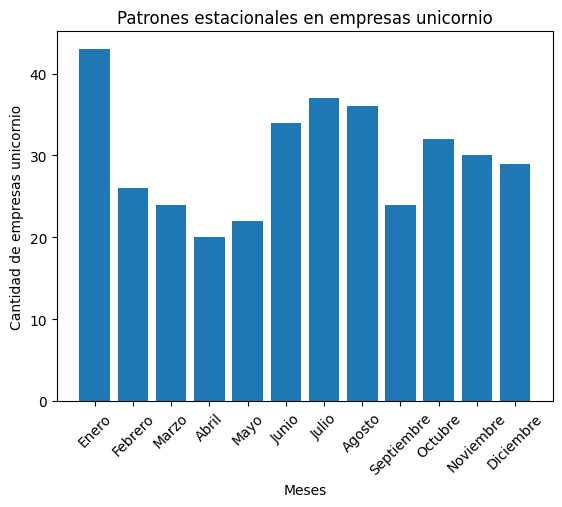

In [43]:

import pandas as pd
import matplotlib.pyplot as plt

# Cargo los datos (esto quizá sea una tontería pero bueno... ya no se que más cambiar porque no me funciona y lo he intentado 2000 veces)
unicornios = pd.read_csv('C:/Users/horta/Desktop/EDA/World_Wide_Unicorn_Startups.csv')

# Combino las columnas 'year', 'month' y 'day' en una única columna 'fecha' y manejar errores en la conversión
unicornios['fecha'] = pd.to_datetime(unicornios[['year', 'month', 'day']], errors='coerce')

# Elimino las filas con fechas no válidas (NaN)
unicornios.dropna(subset=['fecha'], inplace=True)

# Creo una nueva columna con sólo el número de mes (1 para enero, 2 para febrero, etc.)
unicornios['mes_numero'] = unicornios['fecha'].dt.month

# Agrupo los datos por el número de mes y cuento la cantidad de empresas unicornio
unicorns_by_month_number = unicornios.groupby('mes_numero').size()

# Creo un diccionario que mapee los números de los meses a sus nombres correspondientes
meses = { 
    1: 'Enero',
    2: 'Febrero',
    3: 'Marzo',
    4: 'Abril',
    5: 'Mayo',
    6: 'Junio',
    7: 'Julio',
    8: 'Agosto',
    9: 'Septiembre',
    10: 'Octubre',
    11: 'Noviembre',
    12: 'Diciembre'}

# Utilizo el diccionario para reemplazar ls números de los meses por sus nombres en el índice de unicorns_by_month_number
unicorns_by_month_number.index = unicorns_by_month_number.index.map(meses)

# Creo un gráfico de barras para visualizar los patrones estacionales
plt.bar(unicorns_by_month_number.index, unicorns_by_month_number)
plt.xlabel('Meses')
plt.ylabel('Cantidad de empresas unicornio')
plt.title('Patrones estacionales en empresas unicornio')
plt.xticks(rotation=45) # giro los nombre de los meses porque igual no caben y se ve mal.
plt.show()


In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import kruskal

# Calculo la cantidad de empresas unicornio para cada mes
conteo_unicornios_por_mes = unicornios.groupby('mes_numero').size()

# almaceno los conteos de unicornios por cada mes
datos_por_mes = {}
for mes_numero, mes_nombre in meses.items():
    datos_por_mes[mes_nombre] = conteo_unicornios_por_mes[mes_numero]

# Realizo la prueba de Kruskal-Wallis usando una lista de compresion (no recuerdo como se escrib en inglés ahora mismo)
stat, p_value = kruskal(*[datos_por_mes[mes_nombre] for mes_nombre in meses.values()])

# Imprimo el valor p
print("Valor p:", p_value)

# Establezor un nivel de significancia (tengo entendido que 0.05 es lo estandard)
alfa = 0.05

# veo si hay estacionalidad o no
if p_value < alfa:
    print("Se rechaza la hipótesis nula. Hay evidencia de estacionalidad en los datos.")
else:
    print("No se rechaza la hipótesis nula. No hay evidencia de estacionalidad en los datos.")

Valor p: 0.44326327842646435
No se rechaza la hipótesis nula. No hay evidencia de estacionalidad en los datos.


Cuando decimos que una prueba asume que los datos siguen una distribución normal, nos referimos a que la prueba está diseñada para trabajar con datos que provienen de una población que sigue una distribución normal o gaussiana. Es decir en forma de campana.
En el caso de la prueba de Kruskal-Wallis, no asume que los datos siguen una distribución normal. Es una prueba no paramétrica, lo que significa que no se basa en supuestos sobre la distribución de la población subyacente. La prueba de Kruskal-Wallis es útil cuando no se pueden cumplir los supuestos de las pruebas paramétricas, como la normalidad y homogeneidad de varianzas. Aunque es menos potente que las pruebas paramétricas cuando sus supuestos se cumplen, sigue siendo una herramienta valiosa para analizar datos que no cumplen con estos supuestos.
En resumen, si una prueba asume que los datos siguen una distribución normal, está diseñada para funcionar mejor con datos que tienen una distribución normal. Sin embargo, si los datos no siguen una distribución normal, las pruebas no paramétricas como la prueba de Kruskal-Wallis son más apropiadas.